# Influence of Automobile sector on German Politics [Part 1]

In [90]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
from matplotlib.sankey import Sankey
import networkx as nx
from networkx.readwrite import json_graph
from itertools import islice

In [91]:
df = pd.read_excel('Openrefine.xlsx')
df.head(2)

,meeting_id,Ministry,Who_participated?,Type_of_conversation,Topic,Datum,Lobbyists_Name,Lobbyists_Company,Column 9,Column 10
0,1,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2015-09-22 00:00:00,Prof. Dr. Martin Winterkorn,VW AG,NaN,NaN
1,2,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2015-10-12 00:00:00,Harald Krüger,BMW AG,NaN,NaN


In [92]:
pd.set_option('display.max_rows', 400)

In [93]:
df

,meeting_id,Ministry,Who_participated?,Type_of_conversation,Topic,Datum,Lobbyists_Name,Lobbyists_Company,Column 9,Column 10
0,1,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2015-09-22 00:00:00,Prof. Dr. Martin Winterkorn,VW AG,NaN,NaN
1,2,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2015-10-12 00:00:00,Harald Krüger,BMW AG,NaN,NaN
2,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Harald Krüger,BMW AG,NaN,NaN
3,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Matthias Müller,VW AG,NaN,NaN
4,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Dieter Zetsche,Daimler AG,NaN,NaN
5,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Matthias Wissmann,VDA,NaN,NaN
6,4,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2016-03-03 00:00:00,Harald Krüger,BMW AG,NaN,NaN
7,5,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,2016-04-26 00:00:00,Harald Krüger,BMW AG,NaN,NaN
8,5,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,2016-04-26 00:00:00,Matthias Müller,VW AG,NaN,NaN
9,5,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,2016-04-26 00:00:00,Dieter Zetsche,Daimler AG,NaN,NaN


In [6]:
df.columns

Index(['meeting_id', 'Ministry', 'Who_participated?', 'Type_of_conversation',
       'Topic', 'Datum', 'Lobbyists_Name', 'Lobbyists_Company', 'Column 9',
       'Column 10'],
      dtype='object')

In [7]:
del df['Column 9']
del df['Column 10']

In [8]:
df.head(2)

,meeting_id,Ministry,Who_participated?,Type_of_conversation,Topic,Datum,Lobbyists_Name,Lobbyists_Company
0,1,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2015-09-22 00:00:00,Prof. Dr. Martin Winterkorn,VW AG
1,2,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2015-10-12 00:00:00,Harald Krüger,BMW AG


In [9]:
df['Who_participated?'].str.contains('Merkel').value_counts()

False    633
True      41
Name: Who_participated?, dtype: int64

In [10]:
df['Lobbyists_Company'].str.contains('BMW').value_counts()

False    628
True      35
Name: Lobbyists_Company, dtype: int64

In [11]:
df['Lobbyists_Company'].str.contains('VW').value_counts()

False    600
True      63
Name: Lobbyists_Company, dtype: int64

# Total contacts of ministries with automobile industry

In [12]:
df.groupby('Ministry')['Lobbyists_Company'].count()

Ministry
Auswärtiges Amt                                                            13
Bundeskanzleramt                                                           31
Bundesministerium der Finanzen                                             11
Bundesministerium der Verteidigung                                          4
Bundesministerium für Arbeit und Soziales                                  51
Bundesministerium für Bildung und Forschung                                47
Bundesministerium für Ernährung und Landwirtschaft                          5
Bundesministerium für Gesundheit                                            2
Bundesministerium für Umwelt,  Naturschutz,  Bau und Reaktorsicherheit     26
Bundesministerium für Verkehr und digitale Infrastruktur                  167
Bundesministerium für Wirtschaft und Energie                              217
Innenministerium                                                            6
Ministerium für Justiz und für Verbraucherschutz       

In [13]:
matplotlib.rcParams['pdf.fonttype'] = 42

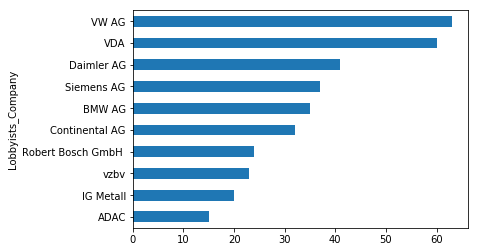

In [14]:
df.groupby('Lobbyists_Company')['Ministry'].count().sort_values(ascending=True).tail(10).plot(kind='barh')
plt.savefig('Top_10_Lobbyists_Companies.svg')

# Sankey Diagramm, showing which ministries were in contact with which persons

In [15]:
df1 = df.groupby('Ministry')['Lobbyists_Name'].value_counts().to_frame()

In [16]:
df1 = df1.rename(columns={'Lobbyists_Name': 'Count'})

In [17]:
#df1.reset_index(level=1, inplace=True)

In [18]:
#df1.reset_index(level=0, inplace=True)

In [19]:
df1.head()

,Ministry,Lobbyists_Name,Count
0,Auswärtiges Amt,Jens Hanefeld,6
1,Auswärtiges Amt,Matthias Müller,2
2,Auswärtiges Amt,Andreas Renschler,1
3,Auswärtiges Amt,Andreas Rentschler,1
4,Auswärtiges Amt,Glaucio Wander Lemos,1


In [20]:
df1.groupby('Ministry')['Lobbyists_Name', 'Count', 'Ministry'].head(10)#.sort_values()#.plot(kind='barh')

,Lobbyists_Name,Count,Ministry
0,Jens Hanefeld,6,Auswärtiges Amt
1,Matthias Müller,2,Auswärtiges Amt
2,Andreas Renschler,1,Auswärtiges Amt
3,Andreas Rentschler,1,Auswärtiges Amt
4,Glaucio Wander Lemos,1,Auswärtiges Amt
5,Holger Cartsburg,1,Auswärtiges Amt
6,Martin Winterkorn,1,Auswärtiges Amt
7,Harald Krüger,7,Bundeskanzleramt
8,Matthias Wissmann,6,Bundeskanzleramt
9,Dieter Zetsche,4,Bundeskanzleramt


In [21]:
df1.to_csv('Lobbyists_contacts_persons')

In [21]:
#cleaned df:
df3 = pd.read_excel('Lobbyists_contacts_persons.xlsx')

In [22]:
df3

,Column,Ministry,Lobbyists_Name,Count
0,0,Auswärtiges Amt,Jens Hanefeld,6
1,1,Auswärtiges Amt,Matthias Müller,2
2,2,Auswärtiges Amt,Andreas Renschler,1
3,3,Auswärtiges Amt,Andreas Renschler,1
4,4,Auswärtiges Amt,Glaucio Wander Lemos,1
5,5,Auswärtiges Amt,Holger Cartsburg,1
6,6,Auswärtiges Amt,Martin Winterkorn,1
7,7,Bundeskanzleramt,Harald Krüger,7
8,8,Bundeskanzleramt,Matthias Wissmann,6
9,9,Bundeskanzleramt,Dieter Zetsche,4


In [23]:
df2 = df[['Lobbyists_Name', 'Lobbyists_Company']]
df2

,Lobbyists_Name,Lobbyists_Company
0,Prof. Dr. Martin Winterkorn,VW AG
1,Harald Krüger,BMW AG
2,Harald Krüger,BMW AG
3,Matthias Müller,VW AG
4,Dieter Zetsche,Daimler AG
5,Matthias Wissmann,VDA
6,Harald Krüger,BMW AG
7,Harald Krüger,BMW AG
8,Matthias Müller,VW AG
9,Dieter Zetsche,Daimler AG


# Sankey Diagramm, showing which ministries were in contact with which company

In [24]:
df.groupby('Ministry')['Lobbyists_Company'].value_counts()

Ministry                                                                Lobbyists_Company                             
Auswärtiges Amt                                                         VW AG                                             11
                                                                        Daimler AG                                         1
                                                                        Rolls Royce                                        1
Bundeskanzleramt                                                        BMW AG                                             8
                                                                        VDA                                                6
                                                                        VW AG                                              6
                                                                        Daimler AG                                         4
      

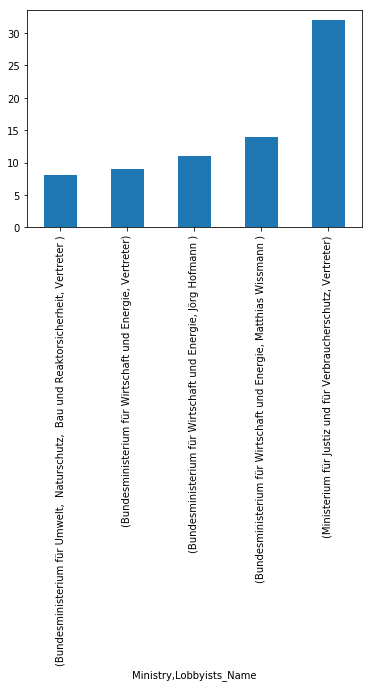

In [32]:
df.groupby('Ministry')['Lobbyists_Name'].value_counts().sort_values().tail().plot(kind='bar')

In [69]:
df5 = df[df.Lobbyists_Name != 'Vertreter'] 

In [70]:
df6 = df5[df5.Lobbyists_Name != ' Vertreter'] 

In [71]:
df7 = df6[df6.Lobbyists_Name != 'Vertreter '] 

In [72]:
df8 = df7[df7.Lobbyists_Name != 'Vertreter Automobilindustrie'] 

In [73]:
df8

,meeting_id,Ministry,Who_participated?,Type_of_conversation,Topic,Datum,Lobbyists_Name,Lobbyists_Company
0,1,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2015-09-22 00:00:00,Prof. Dr. Martin Winterkorn,VW AG
1,2,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2015-10-12 00:00:00,Harald Krüger,BMW AG
2,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Harald Krüger,BMW AG
3,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Matthias Müller,VW AG
4,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Dieter Zetsche,Daimler AG
5,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Matthias Wissmann,VDA
6,4,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2016-03-03 00:00:00,Harald Krüger,BMW AG
7,5,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,2016-04-26 00:00:00,Harald Krüger,BMW AG
8,5,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,2016-04-26 00:00:00,Matthias Müller,VW AG
9,5,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,2016-04-26 00:00:00,Dieter Zetsche,Daimler AG


In [88]:
matplotlib.rcParams['pdf.fonttype'] = 42

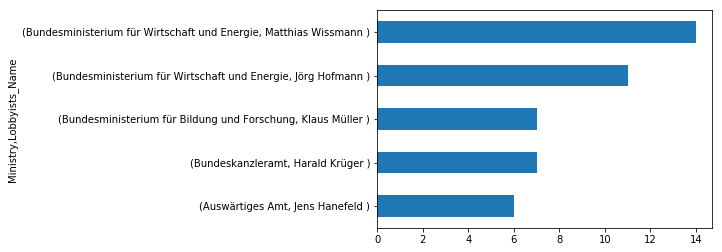

In [89]:
df8.groupby('Ministry')['Lobbyists_Name'].value_counts().sort_values().tail().plot(kind='barh')
plt.savefig('Top_5_Manager.svg')

In [44]:
df5.head()

,meeting_id,Ministry,Who_participated?,Type_of_conversation,Topic,Datum,Lobbyists_Name,Lobbyists_Company
0,1,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2015-09-22 00:00:00,Prof. Dr. Martin Winterkorn,VW AG
1,2,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel,Talk,NaN,2015-10-12 00:00:00,Harald Krüger,BMW AG
2,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Harald Krüger,BMW AG
3,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Matthias Müller,VW AG
4,3,Bundeskanzleramt,Bundeskanzlerin Dr. Angela Merkel (Participati...,Talk,NaN,02.02.16,Dieter Zetsche,Daimler AG


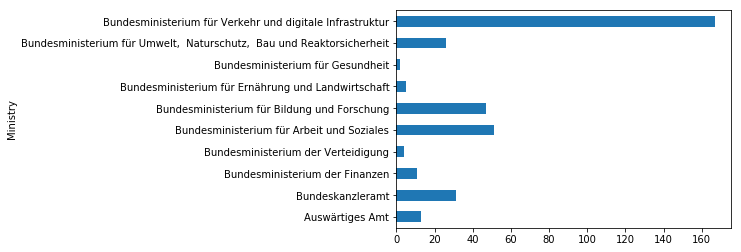

In [85]:
df.groupby('Ministry')['Lobbyists_Company'].count().head(10).plot(kind='barh')